<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/HW2/MBoltzmannDistribution_Savery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi2 distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

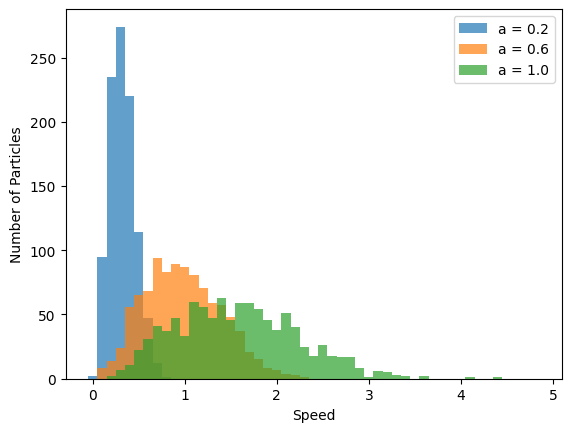

In [2]:
np.random.seed(5)
np.random.randn(123)
mydict = {}
mydict['Maxwell'] = {}

fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    mydict['Maxwell'][a] = sp.stats.chi.rvs(df=3, scale=a, size=1000)
    ax.hist(mydict['Maxwell'][a], bins=np.arange(0,5,0.1)-0.05, alpha=0.7, label="a = %.1f"%a);

pl.legend();

# your code to add labels here

pl.xlabel('Speed')
pl.ylabel('Number of Particles')
pl.show()

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


In the above figure, as $a$ increases the particles are able to reach higher speeds. This tells me that $a$ is proportional $\sqrt(T)$, because temperature is directly related to the kinetic energy and thus speed of the particles. An increasing temperature means on average a higher kinetic energy and speed for the particles.


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi2 distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

From the wikipedia page on the $Χ$ distribution, the equation to find the mean is $μ = \sqrt(2)*\frac{Γ(\frac{k+1}{2})}{Γ(\frac{k}{2})}$.

In [3]:
df = 3
k = df

a1 = 0.2
Mean_a1 = (np.sqrt(2)*(sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)))*a1

emp_meana1 = mydict['Maxwell'][0.2].mean()

Mode_a1 = stats.mode(np.round(mydict['Maxwell'][0.2],decimals=1), axis = None)[0]
#Had to round to the first decimal place to get a value that reasonable matched the graph, 2 decimals gave too small of a mode value.

print(f'The mean for a = 0.2 is {Mean_a1}.')
print(f'The mean of the empirical distribution is {emp_meana1}.')
print(f'The mode of the empirical distribution is {Mode_a1}')

The mean for a = 0.2 is 0.3191538243211462.
The mean of the empirical distribution is 0.32204584035677725.
The mode of the empirical distribution is 0.3


This shows that the empirical mean agrees well with the expected mean for a = 0.2. I used the mode of the distribution to determine the most probable molecular speed seen in the data. This is also in good agreement with both mean values. The mode being 0.3, after rounding, also fits with the graph of the distribution, which appears to be centered around 0.33 or so.

In [4]:
a2 = 0.6
Mean_a2 = (np.sqrt(2)*(sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)))*a2

emp_meana2 = mydict['Maxwell'][0.6].mean()

Mode_a2 = stats.mode(np.round(mydict['Maxwell'][0.6], decimals = 1), axis = None)[0]

print(f'The mean for a = 0.6 is {Mean_a2}.')
print(f'The mean of the empirical distribution is {emp_meana2}.')
print(f'The mode of the empirical distribution is {Mode_a2}')

The mean for a = 0.6 is 0.9574614729634384.
The mean of the empirical distribution is 0.9767475006327578.
The mode of the empirical distribution is 0.7


Again, the empirical mean matches well with the expected value for a = 0.6. The mode of the distribution is a bit farther away from the mean than it was in the a = 0.2 distribution. This makes sense as this distribution has a much flatter peak in speed, with sevearl different bins having similar counts with around 85 or so each.

In [5]:
a3 = 1.0
Mean_a3 = (np.sqrt(2)*(sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)))*a3

emp_meana3 = mydict['Maxwell'][1.0].mean()

Mode_a3 = stats.mode(np.round(mydict['Maxwell'][1.0], decimals = 1), axis = None)[0]

print(f'The mean for a = 0.6 is {Mean_a3}.')
print(f'The mean of the empirical distribution is {emp_meana3}.')
print(f'The mode of the empirical distribution is {Mode_a3}')

The mean for a = 0.6 is 1.5957691216057308.
The mean of the empirical distribution is 1.5701960178475707.
The mode of the empirical distribution is 1.4


The empirical mean is in good agreement with the expected value, only being off by 0.02. The mode is also in agreement with these mean values, although a bit farther away than than in the a = 0.2 case. This probably due to the flatter peak in speed.

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [6]:
# your code here